ref: https://zenn.dev/tirimen/articles/0c70e82df4add4

ref(code): https://kiseno-log.com/2021/02/03/%E3%82%AC%E3%82%A6%E3%82%B9%E9%81%8E%E7%A8%8B%E5%9B%9E%E5%B8%B0%E3%82%92python%E3%81%A7%E5%AE%9F%E8%A3%85%E3%81%97%E3%81%A6%E3%81%BF%E3%82%8B/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("p1_5S11ep=disp.txt") as f:
    text=f.readlines()
sharp_marker=[]

i_read_sharp_before=0
sharp_statements=[]
values=[]
#データをラベル情報を含む#ヘッダーの行とデータのクラスタに分離
for i in range(len(text)):
    if text[i][0]=="#":
        if i_read_sharp_before==0:
            if i!=0:
                sharp_statements.append(sharp_statement)
                values.append(value)
            sharp_statement=[]
            value=[]
        sharp_statement.append(text[i])
        i_read_sharp_before=1
    else:
        value.append(text[i])
        i_read_sharp_before=0

#データのクラスタについてさらに分離
freqs=[]
magns=[]
phass=[]
for i in range(len(values)):
    freq=[]
    magn=[]
    phas=[]
    for j in range(len(values[i])):
        val_data=values[i][j].replace("\n","").split("\t")
        freq.append(float(val_data[0]))
        magn.append(float(val_data[1]))
        phas.append(float(val_data[2]))
    freqs.append(freq)
    magns.append(magn)
    phass.append(phas)

In [8]:
value=sharp_statements[0][0][15:].split(";")
for i in range(len(value)):
    if i == len(value)-1:
         val_label=value[i].split("=")[0]
         val=float(value[i].split("=")[1][:-2])
    else:
        val_label=value[i].split("=")[0]
        val=float(value[i].split("=")[1])

['height', '80']

In [14]:
 value[4].split("=")[0]

' wid'

TabError: inconsistent use of tabs and spaces in indentation (3746026015.py, line 45)

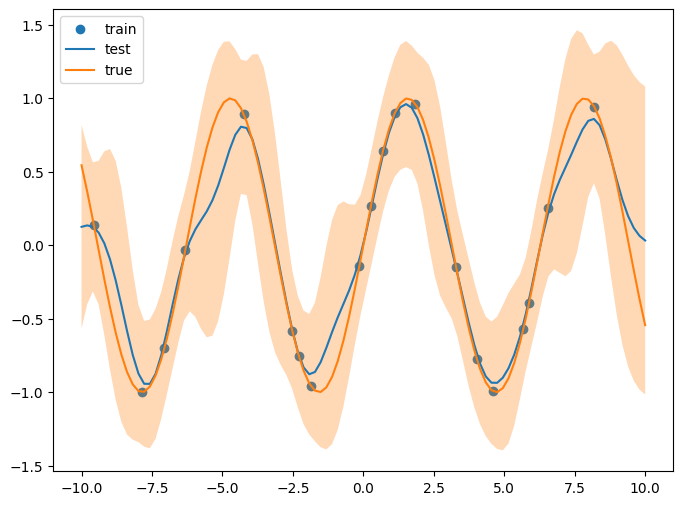

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class kernel:
    def __init__(self, s1=1.0, s2=1.0, s3=0.1):
        self.s1, self.s2, self.s3 = s1,s2,s3

    def rbf_white(self,x, x_p,i=1):
        """カーネル計算"""
        # cdist:n-ベクトル間のユークリッド距離
        if i ==1:
            k =  self.s1 * np.exp(-1.0 * cdist(x, x_p, 'sqeuclidean')/self.s2) + (self.s3 * np.eye(x.shape[0]))
        else:
            k =  self.s1 * np.exp(-1.0 * cdist(x, x_p, 'sqeuclidean')/self.s2) 
        return k
    


# サンプルデータの作成
x_train = np.expand_dims(np.random.uniform(-10,10,20), 1) # 学習データ
x_test = np.linspace(-10,10,100).reshape(-1,1) # テストデータ

y_train = np.sin(x_train)

# 計算準備
kernel = kernel()

k11 = kernel.rbf_white(x_train,x_train)
k12 = kernel.rbf_white(x_train,x_test,0)
k22 = kernel.rbf_white(x_test,x_test)
k11_inv = np.linalg.inv(k11)

# 期待値
y_test = np.dot(k12.T, np.dot(k11_inv, y_train))
# 分散
vars = k22 - np.dot(k12.T, np.dot(k11_inv, k12))
# 標準偏差
y_test_std =  np.sqrt(np.diag(vars)).reshape(-1,1)

# 結果の作図
fig,ax = plt.subplots(figsize=(8,6))

ax.scatter(x_train,y_train,label="train")
ax.plot(x_test, y_test, label="test")
ax.plot(x_test, np.sin(x_test),label="true")
plt.fill_between(x_test.flatten(), (y_test + y_test_std).flatten(), (y_test - y_test_std).flatten(), alpha=0.3)

ax.legend()

In [18]:
# サンプルデータの作成
x1_train = np.expand_dims(np.random.uniform(-10,10,100), 1) 
x2_train = np.expand_dims(np.random.uniform(-10,10,100), 1) 
x_train  = np.append(x1_train,x2_train,axis=1)

x1_test = np.expand_dims(np.random.uniform(-10,10,50), 1) 
x2_test = np.expand_dims(np.random.uniform(-10,10,50), 1)
x_test  = np.append(x1_test,x2_test,axis=1)

y_train = x1_train / x2_train

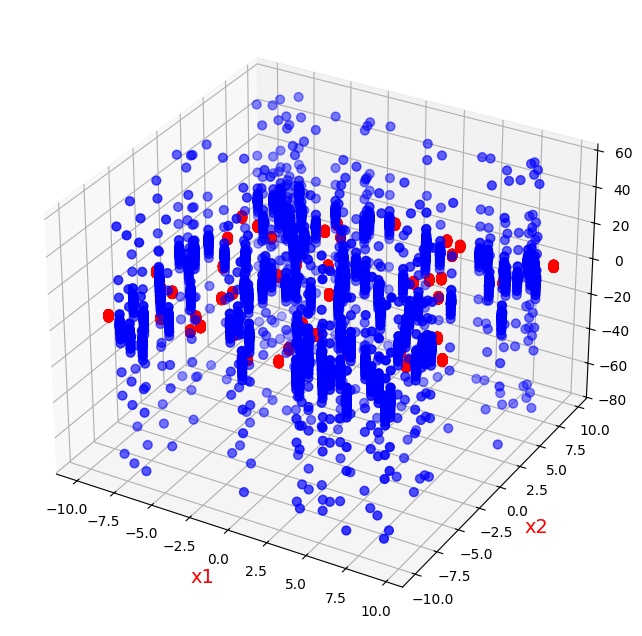

In [19]:
# 作図準備
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルを設定
ax.set_xlabel("x1", size = 14, color = "r")
ax.set_ylabel("x2", size = 14, color = "r")
ax.set_zlabel("y", size = 14, color = "r")

# 描画
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, s = 40, c = "blue",label="train")
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, s = 40, c = "red",label="test")

plt.show()